In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls
import pickle

%matplotlib inline

In [2]:
pickle_in1 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/Wind speed/3points/winds_turn2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [3]:
two = np.append(example1, example2)

In [4]:
three = np.append(two, example3)
full = np.append(three, example4)

In [5]:
wnd_avg = np.array([])
wnd_min = np.array([])
wnd_max = np.array([])
wnd_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_avg = np.append(wnd_avg, full[start:end].mean())
    wnd_min = np.append(wnd_min, full[start:end].min())
    wnd_max = np.append(wnd_max, full[start:end].max())
    wnd_std = np.append(wnd_std, full[start:end].std())

In [6]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [7]:
two = np.append(example1[:,143,240], example2[:,143,240])
three = np.append(two, example3[:,143,240])
fullc = np.append(three, example4[:,143,240])
fullc.shape

(35064,)

In [8]:
cur_avg = np.array([])
cur_min = np.array([])
cur_max = np.array([])
cur_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())
    cur_min = np.append(cur_min, fullc[start:end].min())
    cur_max = np.append(cur_max, fullc[start:end].max())
    cur_std = np.append(cur_std, fullc[start:end].std())

In [9]:
pickle_in1 = open("/home/abhudia/Desktop/salinity/3points/turn2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/salinity/3points/turn2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/salinity/3points/turn2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/salinity/3points/turn2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

two = np.append(example1, example2)
three = np.append(two, example3)
fulls = np.append(three, example4)

In [10]:
sal_avg = np.array([])
sal_min = np.array([])
sal_max = np.array([])
sal_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    sal_avg = np.append(sal_avg, fulls[start:end].mean())
    sal_min = np.append(sal_min, fulls[start:end].min())
    sal_max = np.append(sal_max, fulls[start:end].max())
    sal_std = np.append(sal_std, fulls[start:end].std())

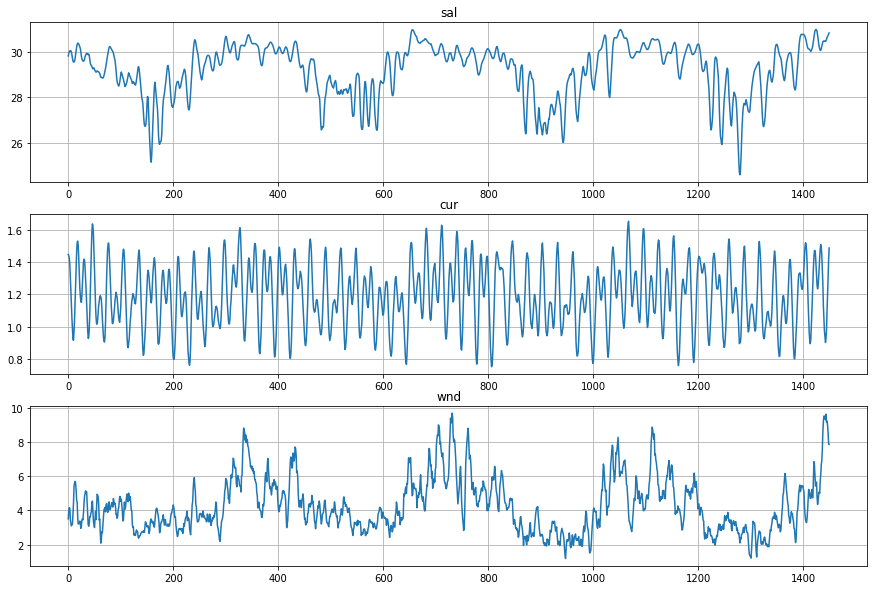

In [11]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
ax[0].plot(sal_avg)
ax[0].set_title('sal')
ax[1].plot(cur_avg)
ax[1].set_title('cur')
ax[2].plot(wnd_avg)
ax[2].set_title('wnd')
for ax in ax:
    ax.grid('on');